In [0]:
import os
import zipfile

path_to_zip = '/home/new-animal-dataset.zip'
zip_ref = zipfile.ZipFile(path_to_zip, 'r')
zip_ref.extractall('/home')
zip_ref.close()

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
  include_top=False,
  input_shape=(150, 150, 3))



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
datadir = '/home/new-animal-dataset'

train_dir = datadir + '/training'
validation_dir = datadir + '/validation'

train_cats_dir = datadir + '/training/cat/'
train_dogs_dir = datadir + '/training/dog'

validation_cats_dir = datadir + '/validation/cat'
validation_dogs_dir = datadir + '/validation/dog'

test_cats_dir = datadir + '/test/cat'
test_dogs_dir = datadir + '/test/dog'

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(lr=2e-5),
  metrics=['acc'])

In [10]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 60/100 [=================>............] - ETA: 11s - loss: 0.5094 - acc: 0.7425

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expect

 99/100 [============================>.] - ETA: 0s - loss: 0.4486 - acc: 0.7838

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

100/100 [==============================] - 28s 276ms/step - loss: 0.4469 - acc: 0.7845 - val_loss: 0.1893 - val_acc: 0.9250
Epoch 2/30
100/100 [==============================] - 23s 226ms/step - loss: 0.2692 - acc: 0.8875 - val_loss: 0.4071 - val_acc: 0.8330
Epoch 3/30
100/100 [==============================] - 22s 223ms/step - loss: 0.2010 - acc: 0.9190 - val_loss: 0.1857 - val_acc: 0.9380
Epoch 4/30
100/100 [==============================] - 22s 216ms/step - loss: 0.1616 - acc: 0.9320 - val_loss: 0.0928 - val_acc: 0.9670
Epoch 5/30
100/100 [==============================] - 23s 225ms/step - loss: 0.1363 - acc: 0.9460 - val_loss: 0.0970 - val_acc: 0.9560
Epoch 6/30
100/100 [==============================] - 22s 224ms/step - loss: 0.1295 - acc: 0.9435 - val_loss: 0.1291 - val_acc: 0.9570
Epoch 7/30
100/100 [==============================] - 22s 217ms/step - loss: 0.1179 - acc: 0.9535 - val_loss: 0.1231 - val_acc: 0.9670
Epoch 8/30
100/100 [==============================] - 22s 217ms/st

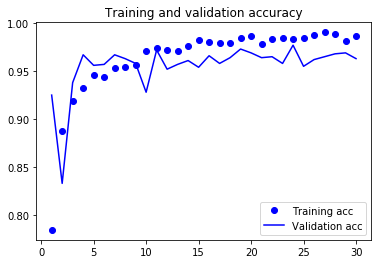

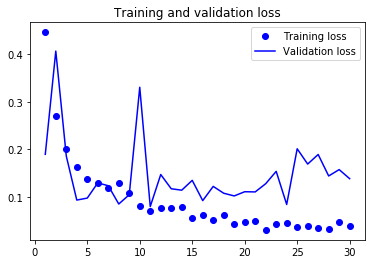

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
#Unfreeze block 5
conv_base.trainable = True

for layer in conv_base.layers:
  if "block5_conv" in layer.name:
    layer.trainable = True
  else:
    layer.trainable = False


In [13]:
model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(lr=1e-5),
  metrics=['acc'])

history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50)


Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expect

 99/100 [============================>.] - ETA: 0s - loss: 0.0133 - acc: 0.9960

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

100/100 [==============================] - 20s 196ms/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.1173 - val_acc: 0.9700
Epoch 2/30
100/100 [==============================] - 19s 189ms/step - loss: 0.0104 - acc: 0.9950 - val_loss: 0.1188 - val_acc: 0.9690
Epoch 3/30
100/100 [==============================] - 18s 178ms/step - loss: 0.0059 - acc: 0.9975 - val_loss: 0.1530 - val_acc: 0.9700
Epoch 4/30
100/100 [==============================] - 19s 192ms/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.1112 - val_acc: 0.9710
Epoch 5/30
100/100 [==============================] - 18s 177ms/step - loss: 0.0091 - acc: 0.9960 - val_loss: 0.1418 - val_acc: 0.9680
Epoch 6/30
100/100 [==============================] - 19s 190ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 0.1419 - val_acc: 0.9680
Epoch 7/30
100/100 [==============================] - 18s 177ms/step - loss: 0.0115 - acc: 0.9960 - val_loss: 0.1373 - val_acc: 0.9740
Epoch 8/30
100/100 [==============================] - 18s 178ms/st

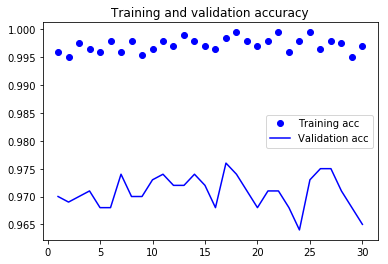

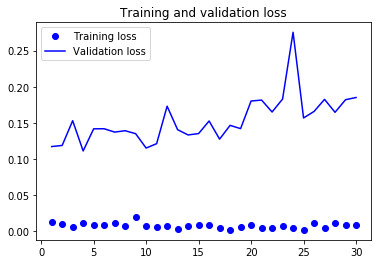

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()